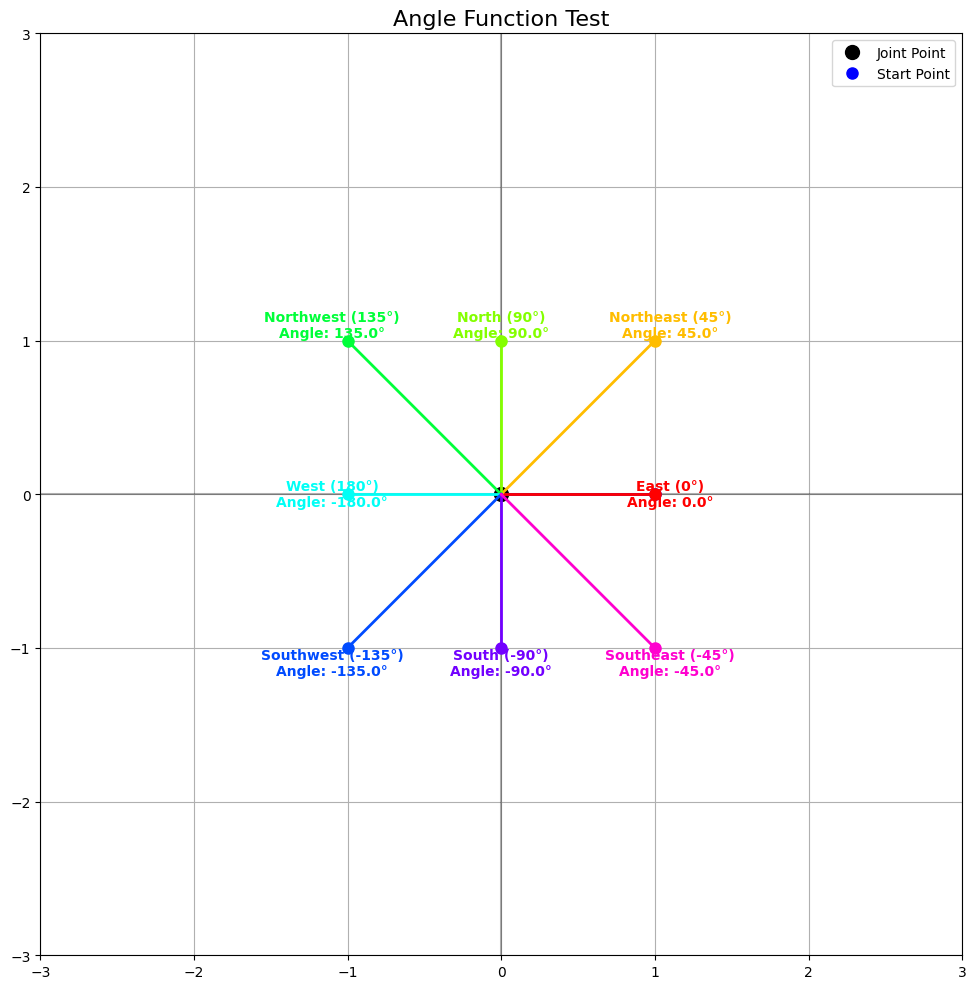

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# The angle function
def keypoint_angle(keypoint_start, keypoint_joint, keypoint_end):    
    # Calculate vectors from joint to start and end points
    x1, y1 = keypoint_start[0] - keypoint_joint[0], keypoint_start[1] - keypoint_joint[1]
    x2, y2 = keypoint_end[0] - keypoint_joint[0], keypoint_end[1] - keypoint_joint[1]
    
    # Calculate the angle using arctan2
    angle1 = math.atan2(y1, x1)
    angle2 = math.atan2(y2, x2)
    
    # Find the difference between the angles
    angle = angle2 - angle1
    
    # Convert to degrees and normalize to range [0, 360)
    angle_deg = math.degrees(angle)
    
    return ((angle_deg + 180) % 360) - 180

# Test function
def test_angle_function():
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Set the joint point at the origin
    joint = (0, 0)
    
    # Set the start point at (1, 0) - pointing east
    start = (1, 0)
    
    # Test points at different angles
    test_points = [
        ("East (0°)", (1, 0)),
        ("Northeast (45°)", (1, 1)),
        ("North (90°)", (0, 1)),
        ("Northwest (135°)", (-1, 1)),
        ("West (180°)", (-1, 0)),
        ("Southwest (-135°)", (-1, -1)),
        ("South (-90°)", (0, -1)),
        ("Southeast (-45°)", (1, -1))
    ]
    
    # Plot joint point
    ax.plot(joint[0], joint[1], 'ko', markersize=10, label='Joint Point')
    
    # Plot start point and line
    ax.plot(start[0], start[1], 'bo', markersize=8, label='Start Point')
    ax.plot([joint[0], start[0]], [joint[1], start[1]], 'b-', linewidth=2)
    
    # Plot each test point and calculate angle
    for i, (name, end) in enumerate(test_points):
        # Calculate angle
        angle = keypoint_angle(start, joint, end)
        
        # Color based on angle
        color = plt.cm.hsv(i / len(test_points))
        
        # Plot end point and line
        ax.plot(end[0], end[1], 'o', color=color, markersize=8)
        ax.plot([joint[0], end[0]], [joint[1], end[1]], '-', color=color, linewidth=2)
        
        # Add text label with angle
        text_x = end[0] * 1.1
        text_y = end[1] * 1.1
        ax.text(text_x, text_y, f"{name}\nAngle: {angle:.1f}°", 
                color=color, fontweight='bold', ha='center', va='center')
    
    # Add title and legend
    plt.title('Angle Function Test', fontsize=16)
    plt.legend(loc='upper right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Run the test
test_angle_function()

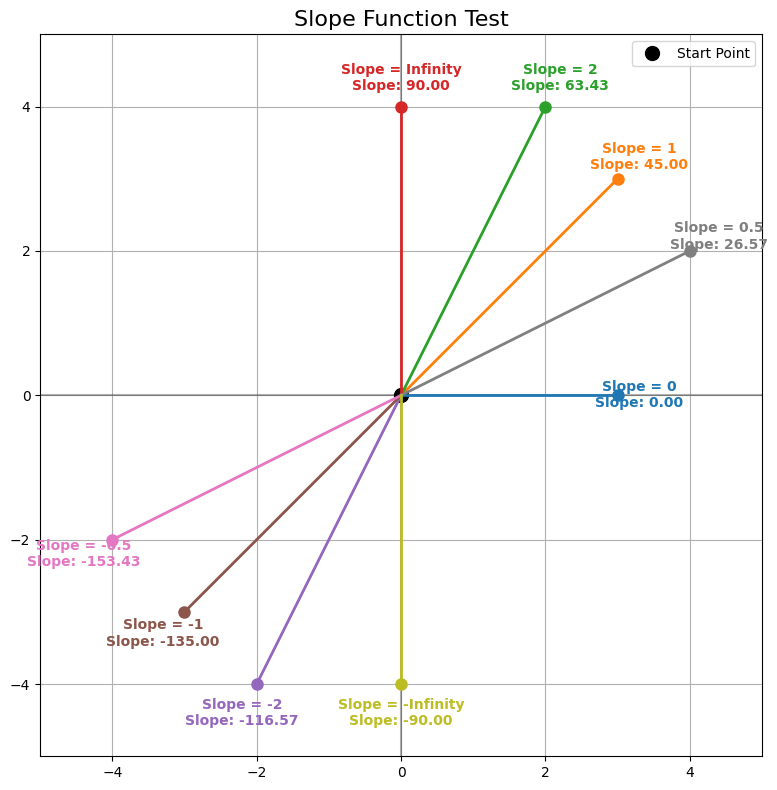

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# The slope function
def keypoint_slope(keypoint_start, keypoint_end):
    dy = keypoint_end[1] - keypoint_start[1]
    dx = keypoint_end[0] - keypoint_start[0]
    

    return keypoint_angle(keypoint_start=(keypoint_start[0]+1, keypoint_start[1]), keypoint_joint=keypoint_start, keypoint_end=keypoint_end)

# Test function
def test_slope_function():
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Set the start point at origin
    start = (0, 0)
    
    # Test points with different slopes
    test_points = [
        ("Slope = 0", (3, 0)),
        ("Slope = 1", (3, 3)),
        ("Slope = 2", (2, 4)),
        ("Slope = Infinity", (0, 4)),
        ("Slope = -2", (-2, -4)),
        ("Slope = -1", (-3, -3)),
        ("Slope = -0.5", (-4, -2)),
        ("Slope = 0.5", (4, 2)),
        ("Slope = -Infinity", (0, -4))
    ]
    
    # Plot start point
    ax.plot(start[0], start[1], 'ko', markersize=10, label='Start Point')
    
    # Plot each test point and calculate slope
    for i, (name, end) in enumerate(test_points):
        # Calculate slope
        slope = keypoint_slope(start, end)
        
        # Format slope value for display
        if slope == float('inf'):
            slope_text = "∞"
        elif slope == float('-inf'):
            slope_text = "-∞"
        else:
            slope_text = f"{slope:.2f}"
        
        # Color based on position
        color = plt.cm.tab10(i % 10)
        
        # Plot end point and line
        ax.plot(end[0], end[1], 'o', color=color, markersize=8)
        ax.plot([start[0], end[0]], [start[1], end[1]], '-', color=color, linewidth=2)
        
        # Add text label with slope
        text_x = end[0] * 1.1
        text_y = end[1] * 1.1
        ax.text(text_x, text_y, f"{name}\nSlope: {slope_text}", 
                color=color, fontweight='bold', ha='center', va='center')
    
    # Add title and legend
    plt.title('Slope Function Test', fontsize=16)
    plt.legend(loc='upper right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Run the test
test_slope_function()